In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Import Data

In [3]:
tracks_data = "data/tracks.csv"
tracks_df = pd.read_csv(tracks_data)
tracks_df

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.744000,0.1510,0.1270,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.000000,0.1480,0.6550,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.021800,0.2120,0.4570,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.918000,0.1040,0.3970,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.130000,0.3110,0.1960,103.220,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586667,5rgu12WBIHQtvej2MdHSH0,云与海,50,258267,0,['阿YueYue'],['1QLBXKM5GCpyQQSVMNZqrZ'],2020-09-26,0.560,0.5180,0,-7.471,0,0.0292,0.785,0.000000,0.0648,0.2110,131.896,4
586668,0NuWgxEp51CutD2pJoF4OM,blind,72,153293,0,['ROLE MODEL'],['1dy5WNgIKQU6ezkpZs4y8z'],2020-10-21,0.765,0.6630,0,-5.223,1,0.0652,0.141,0.000297,0.0924,0.6860,150.091,4
586669,27Y1N4Q4U3EfDU5Ubw8ws2,What They'll Say About Us,70,187601,0,['FINNEAS'],['37M5pPGs6V1fchFJSgCguX'],2020-09-02,0.535,0.3140,7,-12.823,0,0.0408,0.895,0.000150,0.0874,0.0663,145.095,4
586670,45XJsGpFTyzbzeWK8VzR8S,A Day At A Time,58,142003,0,"['Gentle Bones', 'Clara Benin']","['4jGPdu95icCKVF31CcFKbS', '5ebPSE9YI5aLeZ1Z2g...",2021-03-05,0.696,0.6150,10,-6.212,1,0.0345,0.206,0.000003,0.3050,0.4380,90.029,4


## 2. Data Cleaning/Preprocessing

In [4]:
missing = tracks_df.isnull().sum()
summary_df = pd.DataFrame({
    'Data Type': tracks_df.dtypes,
    'Missing Values': missing,
    'Percentage Missing (%)': (missing / len(tracks_df)) * 100
})

summary_df

,Data Type,Missing Values,Percentage Missing (%)
id,object,0,0.000000
name,object,71,0.012102
popularity,int64,0,0.000000
duration_ms,int64,0,0.000000
explicit,int64,0,0.000000
artists,object,0,0.000000
id_artists,object,0,0.000000
release_date,object,0,0.000000
danceability,float64,0,0.000000
energy,float64,0,0.000000


We are missing 71 name values (1.2%) in the data. However, since we're more concerned with the musical characteristics affecting popularity, we don't need to remove these data.

## 3. Basic Data Analysis

In [5]:
summary = tracks_df.describe()
summary

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,586672.000000,5.866720e+05,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000
mean,27.570053,2.300512e+05,0.044086,0.563594,0.542036,5.221603,-10.206067,0.658797,0.104864,0.449863,0.113451,0.213935,0.552292,118.464857,3.873382
std,18.370642,1.265261e+05,0.205286,0.166103,0.251923,3.519423,5.089328,0.474114,0.179893,0.348837,0.266868,0.184326,0.257671,29.764108,0.473162
min,0.000000,3.344000e+03,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.000000,1.750930e+05,0.000000,0.453000,0.343000,2.000000,-12.891000,0.000000,0.034000,0.096900,0.000000,0.098300,0.346000,95.600000,4.000000
50%,27.000000,2.148930e+05,0.000000,0.577000,0.549000,5.000000,-9.243000,1.000000,0.044300,0.422000,0.000024,0.139000,0.564000,117.384000,4.000000
75%,41.000000,2.638670e+05,0.000000,0.686000,0.748000,8.000000,-6.482000,1.000000,0.076300,0.785000,0.009550,0.278000,0.769000,136.321000,4.000000
max,100.000000,5.621218e+06,1.000000,0.991000,1.000000,11.000000,5.376000,1.000000,0.971000,0.996000,1.000000,1.000000,1.000000,246.381000,5.000000


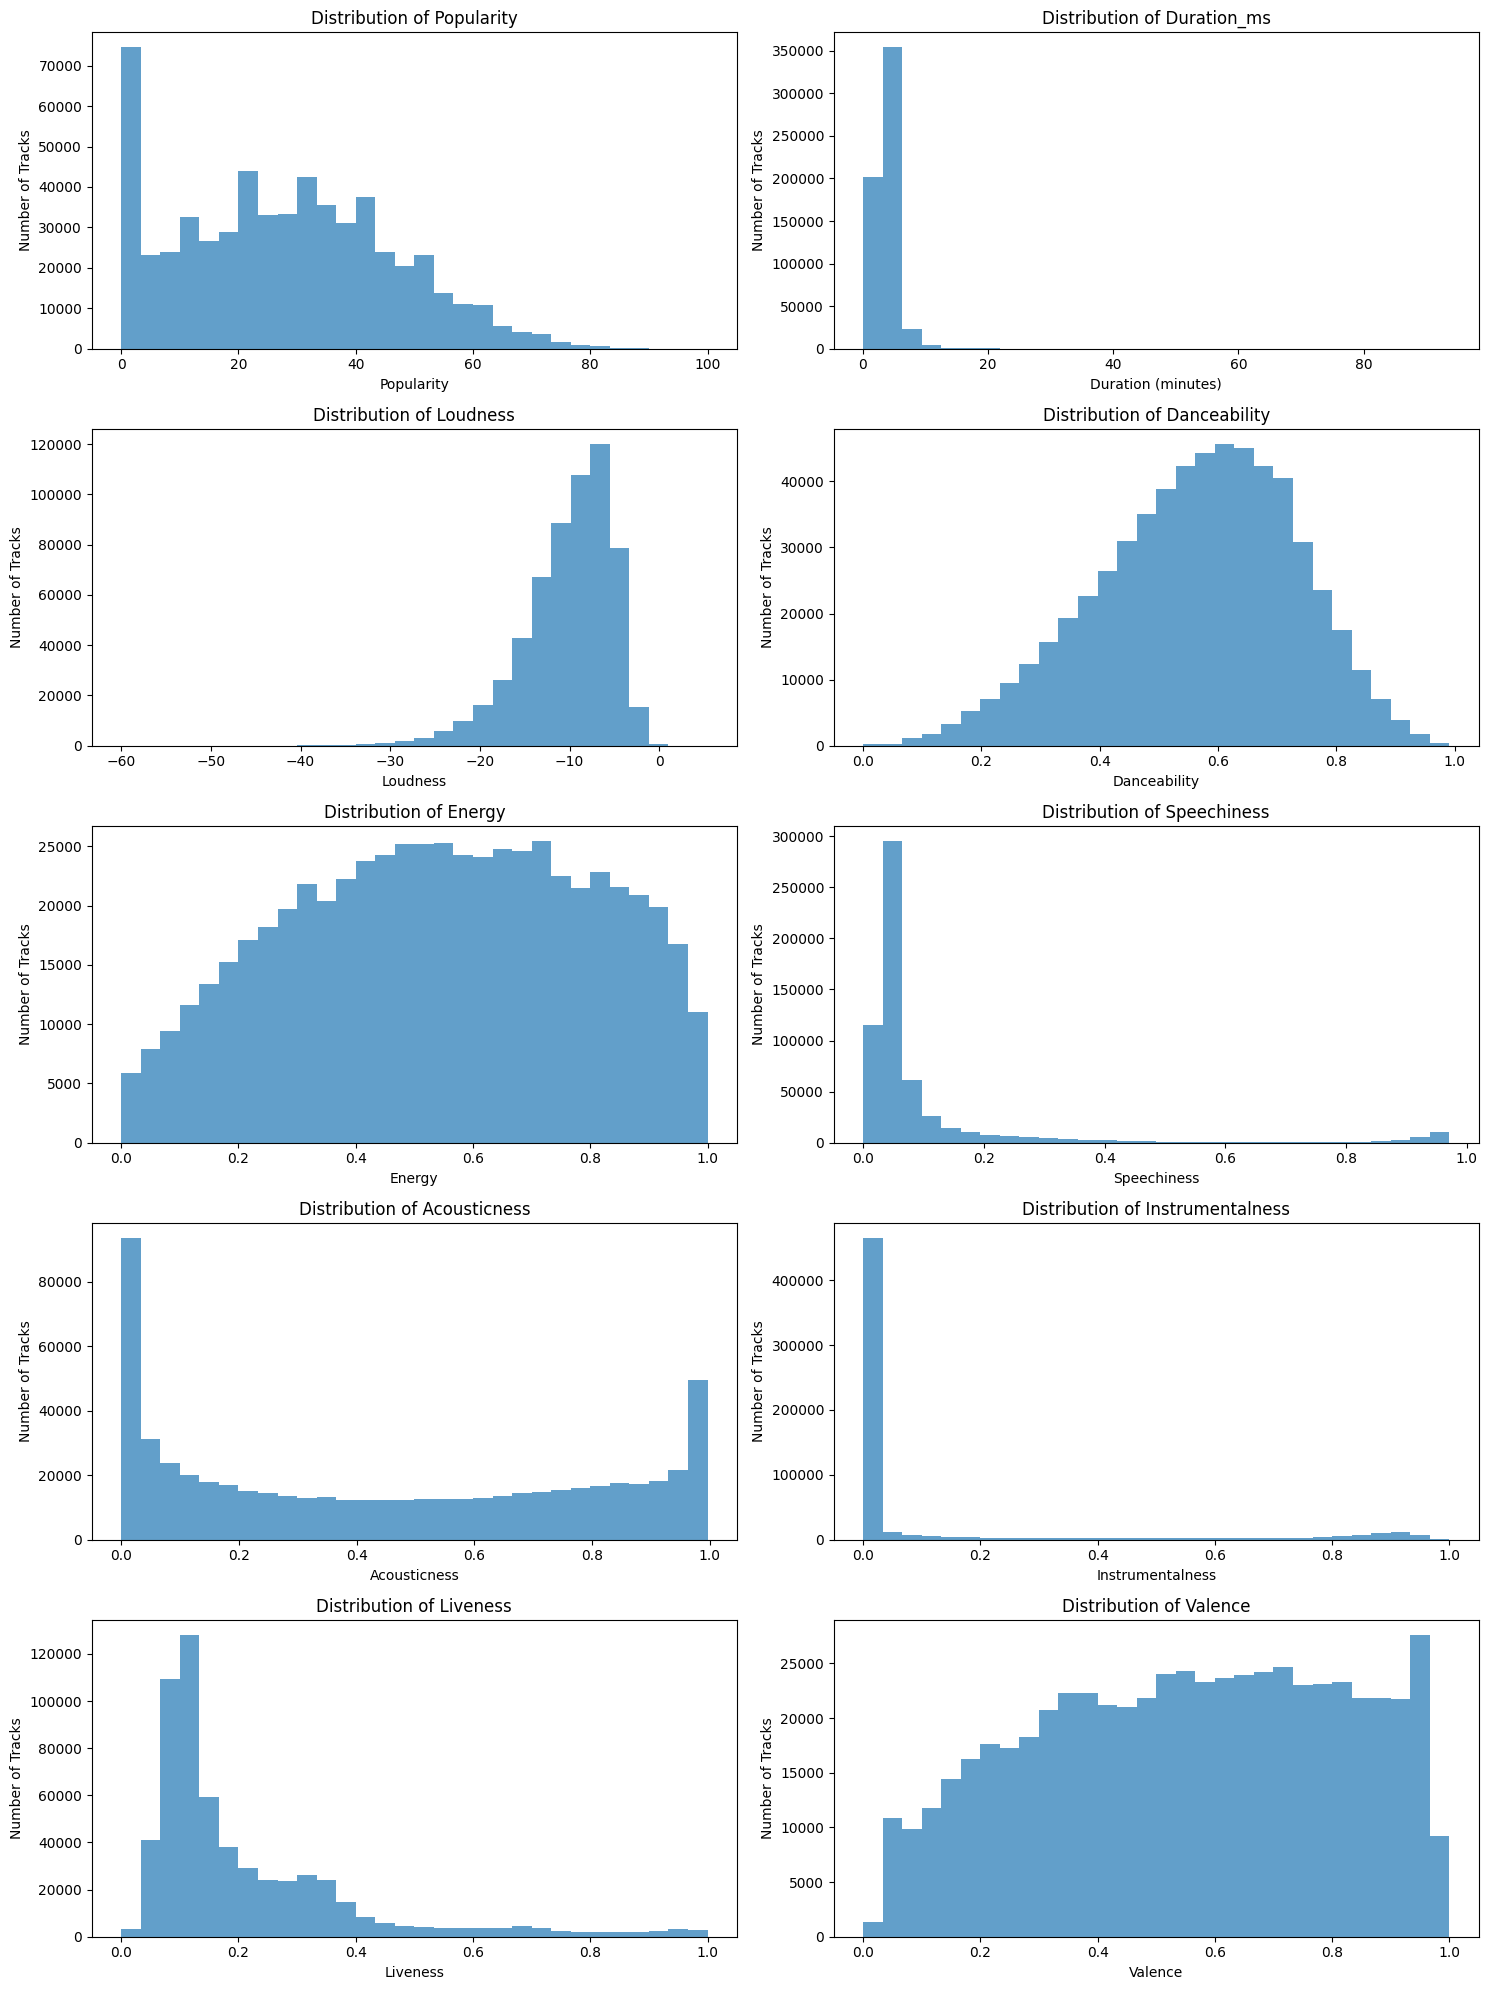

In [6]:
# List of key features to plot
features = ['popularity', 'duration_ms', 'loudness', 'danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence']

# Set up the figure and subplots
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 20))

# Flatten the axes for easy iteration
axes = axes.ravel()

# Plot each feature
for i, feature in enumerate(features):
    # Special case for duration_ms to convert it to minutes for better readability
    if feature == 'duration_ms':
        axes[i].hist(tracks_df[feature] / (60 * 1000), bins=30, alpha=0.7)
        axes[i].set_xlabel('Duration (minutes)')
    else:
        axes[i].hist(tracks_df[feature], bins=30, alpha=0.7)
        axes[i].set_xlabel(feature.capitalize())
    
    axes[i].set_ylabel('Number of Tracks')
    axes[i].set_title(f'Distribution of {feature.capitalize()}')

# Adjust layout for better appearance
plt.tight_layout()
plt.show()

## 4. Advanced Data Analysis

### Relationships between features

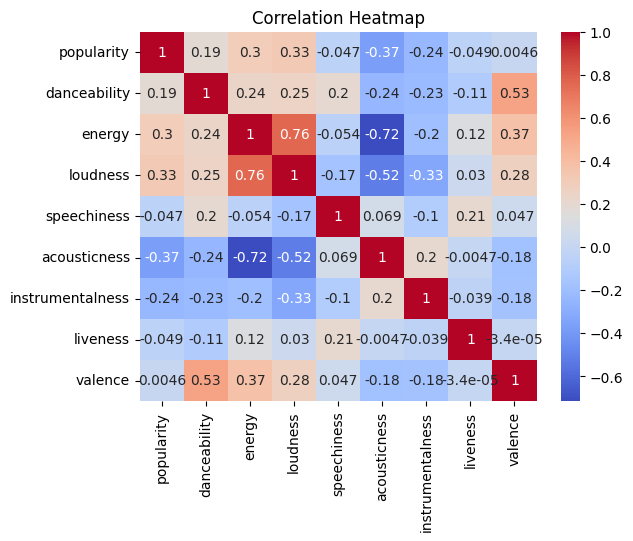

In [7]:
correlation_matrix = tracks_df[['popularity', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### Temporal analysis

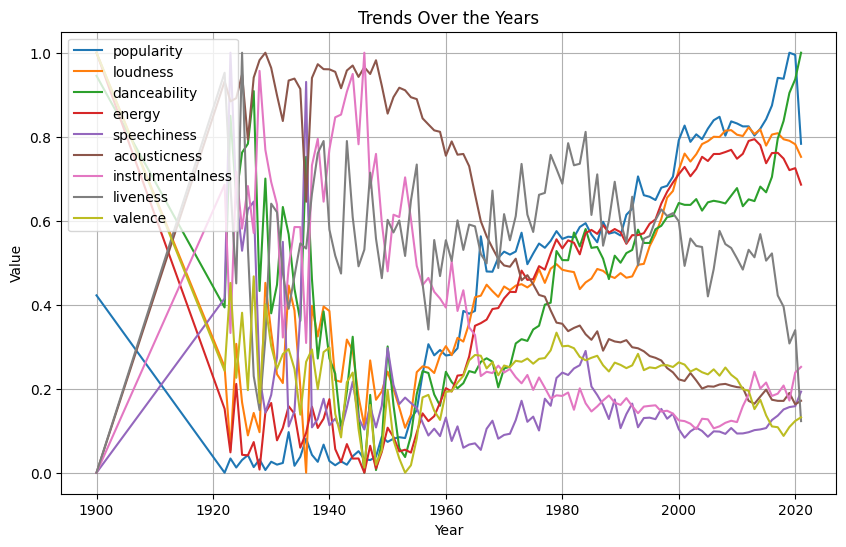

In [8]:
# Convert release_date to datetime and extract year
tracks_df['year'] = pd.to_datetime(tracks_df['release_date'], format='mixed').dt.year

# Group by year and compute mean for each feature
# We need to normalize this so all the trends can be visualized over the same plot

features = ['popularity', 'loudness', 'danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence']
yearly_means = tracks_df.groupby('year')[features].mean()
normalized_yearly_means = (yearly_means - yearly_means.min()) / (yearly_means.max() - yearly_means.min())

# Plotting trends over the years for specific features
normalized_yearly_means[features].plot(figsize=(10, 6))
plt.title('Trends Over the Years')
plt.ylabel('Value')
plt.xlabel('Year')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

### Categorical Analysis

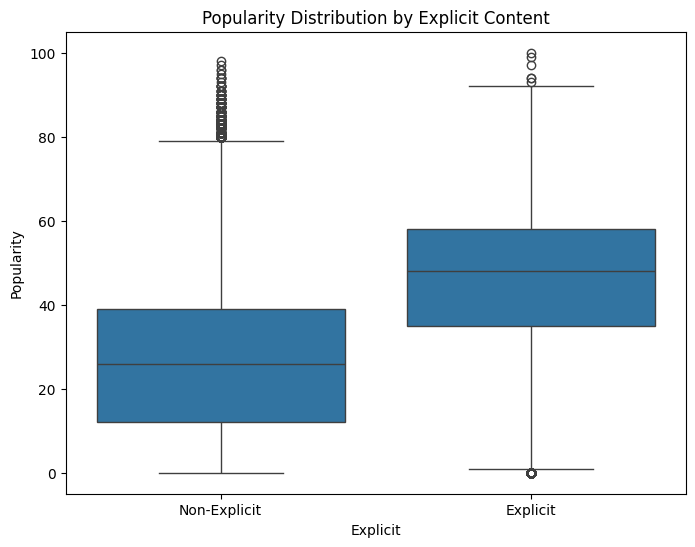

In [9]:
# Analysis of popularity by explicit content
plt.figure(figsize=(8, 6))
sns.boxplot(x='explicit', y='popularity', data=tracks_df)
plt.title('Popularity Distribution by Explicit Content')
plt.xlabel('Explicit')
plt.ylabel('Popularity')
plt.xticks(ticks=[0, 1], labels=['Non-Explicit', 'Explicit'])
plt.show()

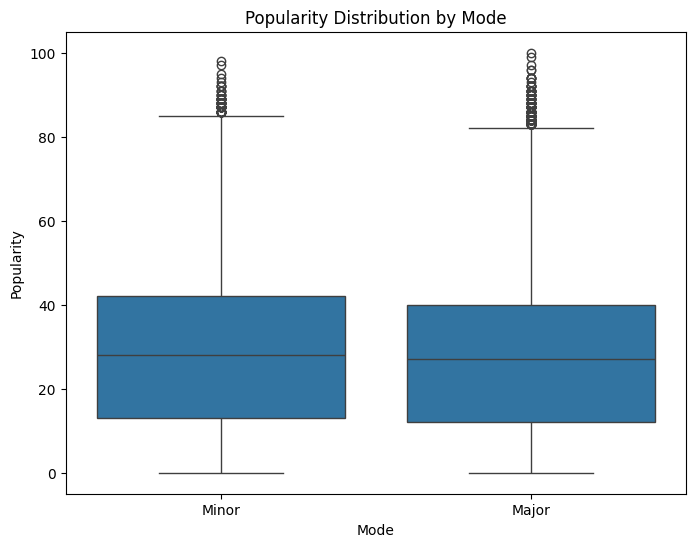

In [10]:
# Analysis of popularity by key
plt.figure(figsize=(8, 6))
sns.boxplot(x='mode', y='popularity', data=tracks_df)
plt.title('Popularity Distribution by Mode')
plt.xlabel('Mode')
plt.ylabel('Popularity')
plt.xticks(ticks=[0, 1], labels=['Minor', 'Major'])
plt.show()